In [1]:
import torch 
from tqdm import tqdm
import torchvision
import torch.nn as nn
from torch.autograd import Variable
from torchvision.datasets import CIFAR10
from torchvision.datasets import MNIST
import torch.utils.data as Data
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib inline

In [2]:
class VAE(nn.Module):
    def __init__(self, input_size, encoding_dim):
        super(VAE, self).__init__()
        self.latent = nn.Sequential(
          nn.Linear(input_size * input_size * 3, 512),
          nn.ReLU(True),
        )
        self.fc1 = nn.Sequential(
            nn.Linear(512, encoding_dim),
            nn.ReLU(True),
        )
        self.fc2 = nn.Sequential(
            nn.Linear(512, encoding_dim),
            nn.ReLU(True),
        )
        self.fc3 = nn.Sequential(
            nn.Linear(encoding_dim, 512),
            nn.ReLU(True),
        )
        self.fc4 = nn.Sequential(
            nn.Linear(512, input_size * input_size * 3),
            nn.Sigmoid(),
        )
    def encode(self, x):
        z_mean = self.fc1(self.latent(x))
        z_log_sigma = self.fc2(self.latent(x))
        return z_mean, z_log_sigma
    
    def sampling(self, mean, var):
        std = torch.exp(0.5*var)
        eps = torch.randn_like(std)
        return Variable(eps, requires_grad=False)*std+mean

        
    def decode(self, z):
        hidden = self.fc3(z)
        return self.fc4(hidden)
    
    def forward(self, x):
        mean,var = self.encode(x)
        z = self.sampling(mean, var)
        return z, mean, var, self.decode(z)
        

        
BATCH_SIZE = 128
EPOCH = 15 
LR = 0.001
N_TEST_IMG = 5
input_size = 32
encoding_dim = 256
model = VAE(input_size, encoding_dim)
print(model)

VAE(
  (latent): Sequential(
    (0): Linear(in_features=3072, out_features=512, bias=True)
    (1): ReLU(inplace)
  )
  (fc1): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU(inplace)
  )
  (fc2): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU(inplace)
  )
  (fc3): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): ReLU(inplace)
  )
  (fc4): Sequential(
    (0): Linear(in_features=512, out_features=3072, bias=True)
    (1): Sigmoid()
  )
)


In [3]:
x_train = CIFAR10(
    root = './cifar10/',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True,
)

print("The input dimensions are: ", x_train.train_data.shape)     
print(len(x_train.train_labels))

Files already downloaded and verified
The input dimensions are:  (50000, 32, 32, 3)
50000


  0%|          | 0/390 [00:00<?, ?it/s]/Users/haosheng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Epoch:  0 | train loss: 0.7005


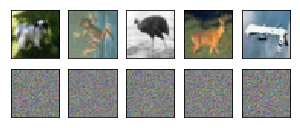

391it [00:35, 11.04it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  1 | train loss: 0.6213


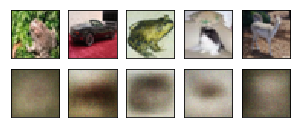

391it [00:56,  6.86it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  2 | train loss: 0.6157


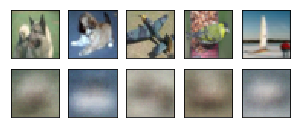

391it [01:04,  6.09it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  3 | train loss: 0.6100


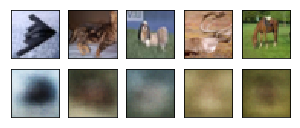

391it [01:05,  5.93it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  4 | train loss: 0.6075


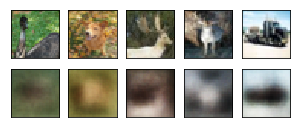

391it [01:06,  5.89it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  5 | train loss: 0.6111


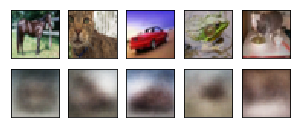

391it [01:05,  5.98it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  6 | train loss: 0.5978


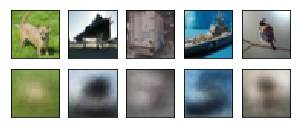

391it [01:03,  6.15it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  7 | train loss: 0.5999


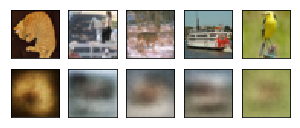

391it [01:03,  6.20it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  8 | train loss: 0.5988


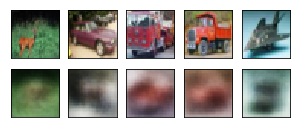

391it [01:03,  6.20it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  9 | train loss: 0.6064


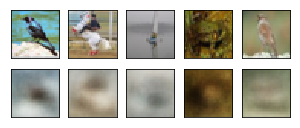

391it [01:03,  6.20it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  10 | train loss: 0.6003


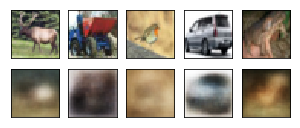

391it [01:03,  6.21it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  11 | train loss: 0.6129


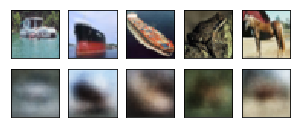

391it [01:02,  6.22it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  12 | train loss: 0.5984


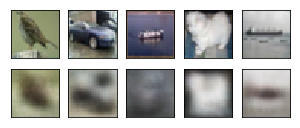

391it [01:03,  6.18it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  13 | train loss: 0.6018


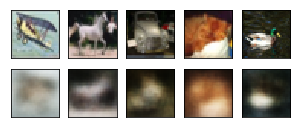

391it [01:02,  6.21it/s]                         
  0%|          | 0/390 [00:00<?, ?it/s]

Epoch:  14 | train loss: 0.6040


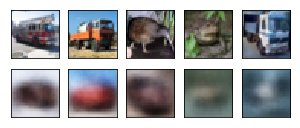

391it [01:03,  6.17it/s]                         


In [4]:
def loss_func(decoded, b_y, mean, var):
    loss_1 = nn.BCELoss()
    loss_2 = -0.5*torch.mean(1+var-mean.pow(2)-var.exp())
    return loss_1(decoded, b_y)+0.01*loss_2
    
train_loader = Data.DataLoader(dataset=x_train, batch_size=BATCH_SIZE, shuffle=True)
autoencoder = VAE(input_size, encoding_dim)
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
#loss_func = nn.MSELoss()

for epoch in range(EPOCH):
    for step, (x,y) in tqdm(enumerate(train_loader), total = int(50000/BATCH_SIZE)):
        b_x = Variable(x.view(-1, input_size*input_size*3))   
        b_y = Variable(x.view(-1, input_size*input_size*3))   
        z, mean, var, decoded = autoencoder(b_x)
        loss = loss_func(decoded, b_y, mean, var)      # mean square error
        optimizer.zero_grad()               
        loss.backward()                     
        optimizer.step()                    
        if step % 500 == 0 and epoch in range(EPOCH):
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data[0])

            decoded_data = decoded
            
            f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
            
            for i in range(N_TEST_IMG):
                a[0][i].imshow(np.swapaxes(np.swapaxes(np.reshape(b_x.data.numpy()[i], (3, input_size, input_size)), 0 ,2), 0, 1))
                a[0][i].set_xticks(())
                a[0][i].set_yticks(())
            
    
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)), 0 ,2),0,1))
                #a[1][i].imshow(np.swapaxes(np.swapaxes(np.reshape(decoded_data.data.numpy()[i], (3, input_size, input_size)),0,2),0,1))
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.show()      

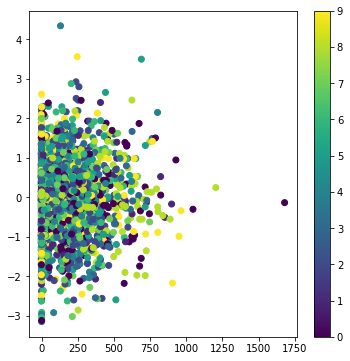

In [6]:
x_sample = Variable(torch.from_numpy(np.reshape(x_train.train_data[:2000],(-1, input_size*input_size*3))).type(torch.FloatTensor))

z, _, _, _ = autoencoder(x_sample)
z = z.detach().numpy()
plt.figure(figsize=(6, 6))
plt.scatter(z[:, 0], z[:, 1], c=x_train.train_labels[:2000])
plt.colorbar()
plt.show()
      